In [1]:
import ase
from mendeleev import Al as elm  # The species
import os
from amstools import *
from ase.lattice.cubic import FaceCenteredCubic
import matplotlib.pyplot as plt
import numpy as np
from ase import io
from ase.optimize import LBFGS
# Load remaining modules
import shutil
import os
import glob
import numpy as np
import copy

In [2]:
def save(file,mydict):
    # ! .npy
    np.save(file,mydict)
    print('mydict has been saved')

def read(file):
    mydict=np.load(file,allow_pickle='TRUE').item()
    return mydict

In [3]:
myresults_S4 = read('cluster_S4.npy')

In [4]:
myresults_S6 = read('cluster_S6_big.npy')

In [5]:
myresults_S6

{'eam': {'divac_e_ur': [-0.029706542125495616,
   -0.3082037867384315,
   -0.4424689195338942,
   -0.37789604795170817,
   -0.3778959820419914,
   -0.36893948481701955,
   -0.22898518037527538],
  'divac_e_r': [-0.01188297500493718,
   0.1985489715393669,
   0.0761431601631557,
   0.32395915251618135,
   0.3239591568631113,
   1.148760988551203,
   0.752951756528546],
  'divac_f_ur': [1.5680211919125213,
   2.3358049762314295,
   3.145937172191225,
   3.0813643006090388,
   3.081364234699322,
   3.748274800638683,
   4.284187559361271],
  'divac_f_r': [1.3636171013336025,
   1.829052217953631,
   2.627325092494175,
   2.3795091001411492,
   2.3795090957942193,
   2.2305743272704603,
   3.30225062245745],
  'Ef_ur': 0.6758670631643326,
  'Ef_r': 0.6758670631643326,
  'X': [1, 3, 4, 5, 6, 8, 12]},
 'ace': {'divac_e_ur': [0.48288429588865256,
   0.5487625993500842,
   0.4909270318594281,
   0.7923358187772465,
   0.792338242220012,
   1.0530046429025788,
   1.507652670758489],
  'divac_e_

In [16]:
##myresults_S8 = read('cluster_S8_big.npy')

In [22]:
#myresults_S12 = read('cluster_S12_big.npy')

In [6]:
from numpy import genfromtxt
test = genfromtxt('hoshino_cluster_1.csv', usecols = 1, delimiter=',')

In [7]:
-test

array([-0.07344287, -0.10076542, -0.27194926, -0.13516675, -0.00714331,
       -0.16062825, -0.09704362])

In [8]:
def graph_init():
    #plt.rcParams['text.usetex'] = True
    plt.figure(figsize=(8,6))
    plt.style.use('seaborn-paper')
    params = {'font.size':16 , 'legend.fontsize': 12,'xtick.labelsize' : 14,'ytick.labelsize' : 14,'axes.labelsize' : 16}
    plt.rcParams.update(params)

In [9]:
#from ase.neb import NEB, NEBTools
from ase.neb import SingleCalculatorNEB, NEBTools
# Load AMS Tools (REQUIRED)
from amstools import *
# Load pyace (REQUIRED)
from pyace import *
from ase.io import cfg

<IPython.core.display.Javascript object>


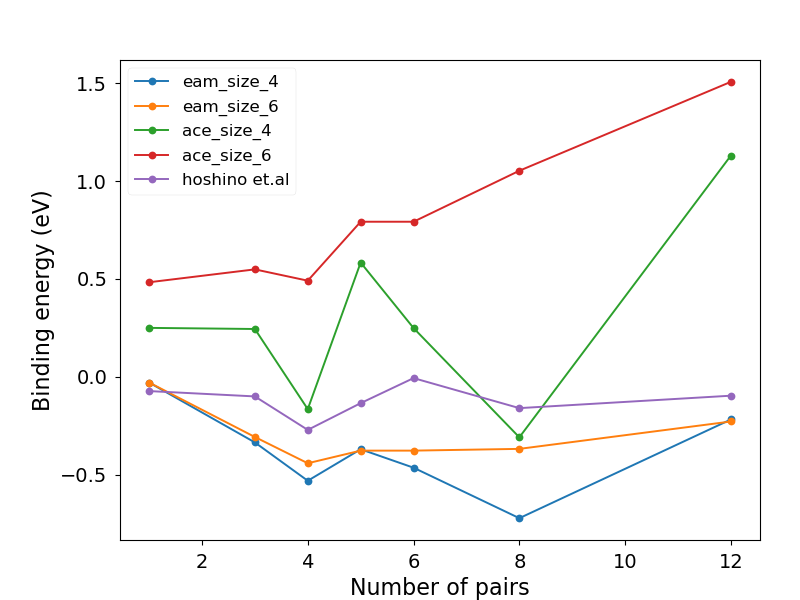

In [10]:
%matplotlib notebook
graph_init()
for key in ['eam','ace']:
        plt.plot(myresults_S4[key]['X'],myresults_S4[key]['divac_e_ur'],'-o',label='{}_size_4'.format(key))
        plt.plot(myresults_S6[key]['X'],myresults_S6[key]['divac_e_ur'],'-o',label='{}_size_6'.format(key))
        #plt.plot(myresults_S8[key]['X'],myresults_S8[key]['divac_e_ur'],'-o',label='{}_size_8'.format(key))
        #plt.plot(myresults_S12[key]['X'],myresults_S12[key]['divac_e_ur'],'-o',label='{}_size_12'.format(key))
        plt.xlabel("Number of pairs")
        plt.ylabel("Binding energy (eV)")

        plt.subplots_adjust(left=0.15,
                            bottom=0.1, 
                            right=0.95, 
                            top=0.90, 
                            wspace=0.05, 
                            hspace=0.05)
        
plt.plot(myresults_S6[key]['X'],-test,'-o',label='hoshino et.al')
plt.legend()
plt.savefig("cluster.png",dpi=150)
plt.show()    
        
#plt.xlabel("No of pair")
#plt.ylabel("Binding energy (eV)")




<IPython.core.display.Javascript object>


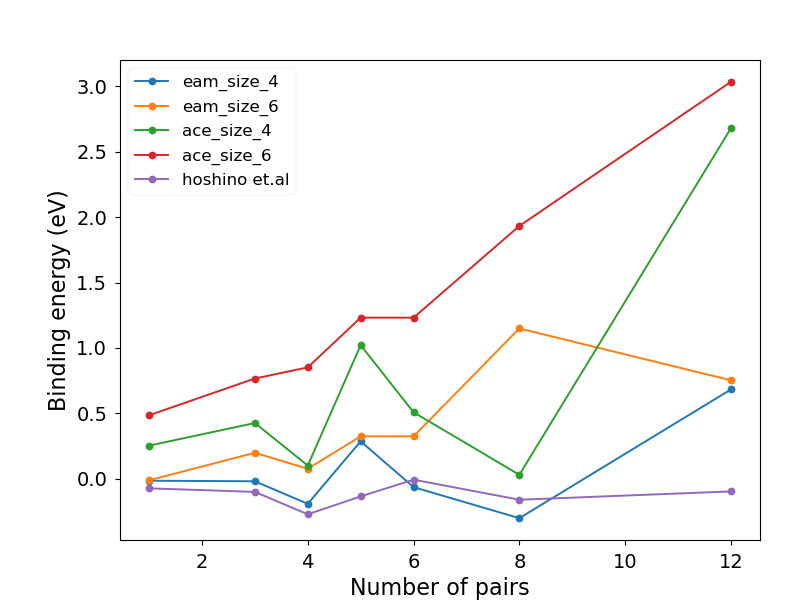

In [11]:
%matplotlib notebook
graph_init()
for key in ['eam','ace']:
        plt.plot(myresults_S4[key]['X'],myresults_S4[key]['divac_e_r'],'-o',label='{}_size_4'.format(key))
        plt.plot(myresults_S6[key]['X'],myresults_S6[key]['divac_e_r'],'-o',label='{}_size_6'.format(key))
        #plt.plot(myresults_S8[key]['X'],myresults_S8[key]['divac_e_r'],'-o',label='{}_size_8'.format(key))
        #plt.plot(myresults_S12[key]['X'],myresults_S12[key]['divac_e_r'],'-o',label='{}_size_12'.format(key))
        plt.xlabel("Number of pairs")
        plt.ylabel("Binding energy (eV)")

        plt.subplots_adjust(left=0.15,
                            bottom=0.1, 
                            right=0.95, 
                            top=0.90, 
                            wspace=0.05, 
                            hspace=0.05)
        
plt.plot(myresults_S6[key]['X'],-test,'-o',label='hoshino et.al')
plt.legend()
plt.savefig("cluster_relax.png",dpi=150)
plt.show()    
        